<a href="https://colab.research.google.com/github/douglasmmachado/MedicineConsumption/blob/master/notebooks/division_approach/5.1_Forecasting_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.1 - Forecasting and prediction validation



---



---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math as m

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image


df_h1_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/master/datasets/division_approach/clustered/df_h1_clustered.csv"
df_h2_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/master/datasets/division_approach/clustered/df_h2_clustered.csv"
df_h3_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/master/datasets/division_approach/clustered/df_h3_clustered.csv"
df_h4_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/master/datasets/division_approach/clustered/df_h4_clustered.csv"



df_h1 = pd.read_csv(df_h1_url)
df_h1['YEAR'] = df_h1['YEAR'].astype(int)
df_h1['MONTH'] = df_h1['MONTH'].astype(int)
df_h1['DATE'] = pd.to_datetime(df_h1['YEAR'].astype(str) + '-' + df_h1['MONTH'].astype(str), format='%Y-%m')

df_h2 = pd.read_csv(df_h2_url)
df_h2['YEAR'] = df_h2['YEAR'].astype(int)
df_h2['MONTH'] = df_h2['MONTH'].astype(int)
df_h2['DATE'] = pd.to_datetime(df_h2['YEAR'].astype(str) + '-' + df_h2['MONTH'].astype(str), format='%Y-%m')

df_h3 = pd.read_csv(df_h3_url)
df_h3['YEAR'] = df_h3['YEAR'].astype(int)
df_h3['MONTH'] = df_h3['MONTH'].astype(int)
df_h3['DATE'] = pd.to_datetime(df_h3['YEAR'].astype(str) + '-' + df_h3['MONTH'].astype(str), format='%Y-%m')

df_h4 = pd.read_csv(df_h4_url)
df_h4['YEAR'] = df_h4['YEAR'].astype(int)
df_h4['MONTH'] = df_h4['MONTH'].astype(int)
df_h4['DATE'] = pd.to_datetime(df_h4['YEAR'].astype(str) + '-' + df_h4['MONTH'].astype(str), format='%Y-%m')

In [ ]:
df_h1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CODE_ATC        525 non-null    int64         
 1   DATE            525 non-null    datetime64[ns]
 2   HOSPI_CODE_UCD  525 non-null    int64         
 3   LIT_HC          525 non-null    float64       
 4   LIT_HP          525 non-null    float64       
 5   MONTH           525 non-null    int64         
 6   N_UFS           525 non-null    float64       
 7   PN_MEDICAL      525 non-null    float64       
 8   POPULATION      525 non-null    float64       
 9   P_MEDICAL       525 non-null    float64       
 10  QUANTITY        525 non-null    float64       
 11  QUANTITY_MA     525 non-null    float64       
 12  SEJ_MCO         525 non-null    float64       
 13  SEJ_SLD         525 non-null    float64       
 14  SEJ_SSR         525 non-null    float64       
 15  WEEK  

In [ ]:
df_h2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CODE_ATC        525 non-null    int64         
 1   DATE            525 non-null    datetime64[ns]
 2   HOSPI_CODE_UCD  525 non-null    int64         
 3   LIT_HC          525 non-null    float64       
 4   LIT_HP          525 non-null    float64       
 5   MONTH           525 non-null    int64         
 6   N_UFS           525 non-null    float64       
 7   PN_MEDICAL      525 non-null    float64       
 8   POPULATION      525 non-null    float64       
 9   P_MEDICAL       525 non-null    float64       
 10  QUANTITY        525 non-null    float64       
 11  QUANTITY_MA     525 non-null    float64       
 12  SEJ_MCO         525 non-null    float64       
 13  SEJ_PSY         525 non-null    float64       
 14  SEJ_SSR         525 non-null    float64       
 15  WEEK  

In [ ]:
df_h3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CODE_ATC        525 non-null    int64         
 1   DATE            525 non-null    datetime64[ns]
 2   HOSPI_CODE_UCD  525 non-null    int64         
 3   LIT_HC          525 non-null    float64       
 4   LIT_HP          525 non-null    float64       
 5   MONTH           525 non-null    int64         
 6   N_UFS           525 non-null    float64       
 7   PN_MEDICAL      525 non-null    float64       
 8   POPULATION      525 non-null    float64       
 9   P_MEDICAL       525 non-null    float64       
 10  QUANTITY        525 non-null    float64       
 11  QUANTITY_MA     525 non-null    float64       
 12  SEJ_HAD         525 non-null    float64       
 13  SEJ_MCO         525 non-null    float64       
 14  SEJ_PSY         525 non-null    float64       
 15  SEJ_SL

In [ ]:
df_h4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CODE_ATC        525 non-null    int64         
 1   DATE            525 non-null    datetime64[ns]
 2   HOSPI_CODE_UCD  525 non-null    int64         
 3   LIT_HC          525 non-null    float64       
 4   LIT_HP          525 non-null    float64       
 5   MONTH           525 non-null    int64         
 6   N_UFS           525 non-null    float64       
 7   PN_MEDICAL      525 non-null    float64       
 8   POPULATION      525 non-null    float64       
 9   P_MEDICAL       525 non-null    float64       
 10  QUANTITY        525 non-null    float64       
 11  QUANTITY_MA     525 non-null    float64       
 12  SEJ_MCO         525 non-null    float64       
 13  SEJ_PSY         525 non-null    float64       
 14  SEJ_SLD         525 non-null    float64       
 15  SEJ_SS

## 5.1 - New database composition based on clusters

In [2]:
df_h1_cluster_0 = df_h1[df_h1['CLUSTER'] == 0].copy()
df_h1_cluster_1 = df_h1[df_h1['CLUSTER'] == 1].copy()
df_h1_cluster_2 = df_h1[df_h1['CLUSTER'] == 2].copy()
df_h1_cluster_3 = df_h1[df_h1['CLUSTER'] == 3].copy()

In [3]:
df_h2_cluster_0 = df_h2[df_h2['CLUSTER'] == 0].copy()
df_h2_cluster_1 = df_h2[df_h2['CLUSTER'] == 1].copy()
df_h2_cluster_2 = df_h2[df_h2['CLUSTER'] == 2].copy()
df_h2_cluster_3 = df_h2[df_h2['CLUSTER'] == 3].copy()

In [4]:
df_h3_cluster_0 = df_h3[df_h3['CLUSTER'] == 0].copy()
df_h3_cluster_1 = df_h3[df_h3['CLUSTER'] == 1].copy()
df_h3_cluster_2 = df_h3[df_h3['CLUSTER'] == 2].copy()
df_h3_cluster_3 = df_h3[df_h3['CLUSTER'] == 3].copy()

In [5]:
df_h4_cluster_0 = df_h4[df_h4['CLUSTER'] == 0].copy()
df_h4_cluster_1 = df_h4[df_h4['CLUSTER'] == 1].copy()
df_h4_cluster_2 = df_h4[df_h4['CLUSTER'] == 2].copy()
df_h4_cluster_3 = df_h4[df_h4['CLUSTER'] == 3].copy()

## 5.2 - Building forecasting models based on clusters

In [ ]:
def plot_scatter(medicines, y_test, y_pred):
    plt.figure(figsize=(12, 6))
    plt.scatter(medicines, y_test, s=20, color='red', label='Test')
    plt.scatter(medicines, y_pred, s=20, color='blue', label='Pred')
    plt.xlabel('HOSPI_CODE_UCD')
    plt.ylabel('QUANTITY')
    plt.title(f'Scatter plot of ground truth and prediction per medicine')
    plt.xticks(rotation=90)
    plt.grid()
    plt.legend(title="Categories")
    plt.show()

In [ ]:
def visualize_decision_tree(regr, feature_names, estimator_index = 5):
    estimator = regr.estimators_[estimator_index]

    # Export as dot file
    export_graphviz(estimator,
                    out_file='tree.dot',
                    feature_names=feature_names,
                    rounded=True,
                    precision=2,
                    filled=True)

    # Convert to png
    call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

    # Display in Jupyter Notebook
    return Image(filename='tree.png')

In [ ]:
def plot_consumption(df_h1,df_h2,df_h3,df_h4,column = 'QUANTITY'):

  n_rows = len(medicines) // 3
  n_cols = 3

  fig, axes = plt.subplots(n_rows, n_cols, sharex=False, figsize=(20, 20))

  for i, medicine in enumerate(medicines):
      ax = axes[i // n_cols, i % n_cols]

      for j, df in enumerate([df_h1, df_h2, df_h3, df_h4]):
          y = df[df['HOSPI_CODE_UCD'] == medicine][column].values
          x = df[df['HOSPI_CODE_UCD'] == medicine]['DATE']
          ax.scatter(x, y, label='Hospital {}'.format(j + 1))

      ax.set_title(f'{column} values for medicine: ' + str(medicine))
      ax.grid(True)
      ax.xaxis.set_major_locator(mdates.AutoDateLocator())
      ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
      ax.tick_params(axis='x', rotation=45)
      ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.7), borderaxespad=0.)

  plt.tight_layout(rect=[0, 0, 0.85, 1])
  plt.show()

In [ ]:
import matplotlib.dates as mdates

medicines_h1 = set(df_h1.HOSPI_CODE_UCD.unique())
medicines_h2 = set(df_h2.HOSPI_CODE_UCD.unique())
medicines_h3 = set(df_h3.HOSPI_CODE_UCD.unique())
medicines_h4 = set(df_h4.HOSPI_CODE_UCD.unique())

medicines = medicines_h1 | medicines_h2 | medicines_h3 | medicines_h4

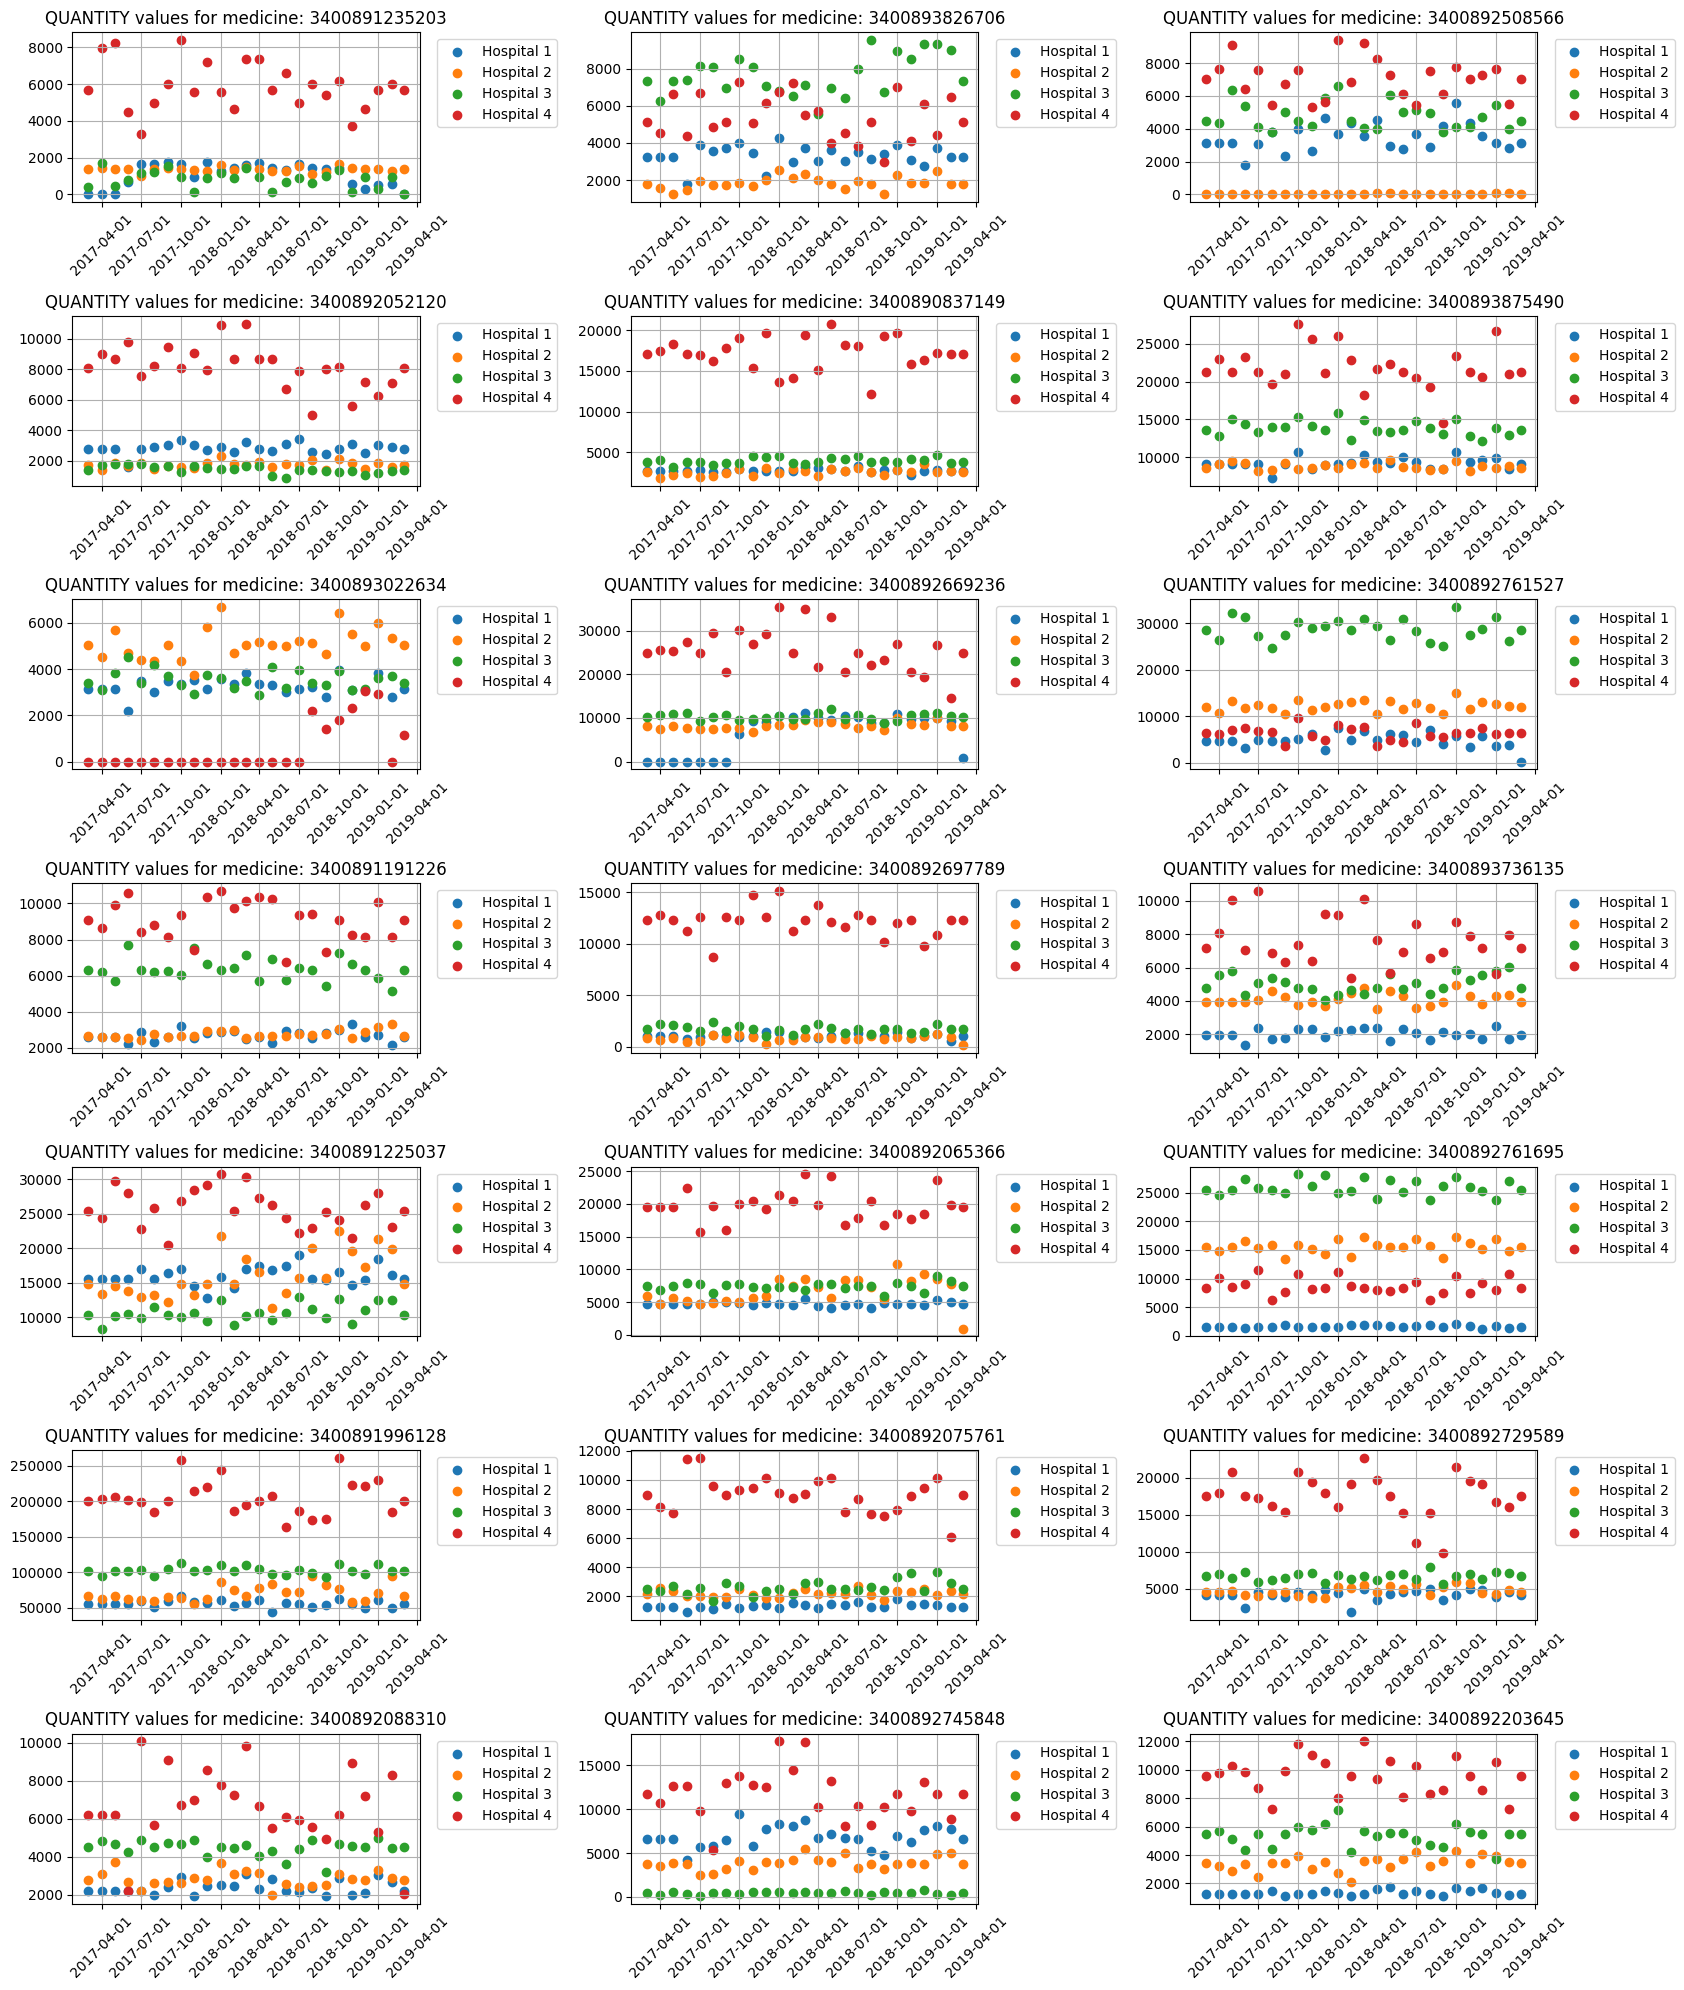

In [ ]:
plot_consumption(df_h1,df_h2,df_h3,df_h4)

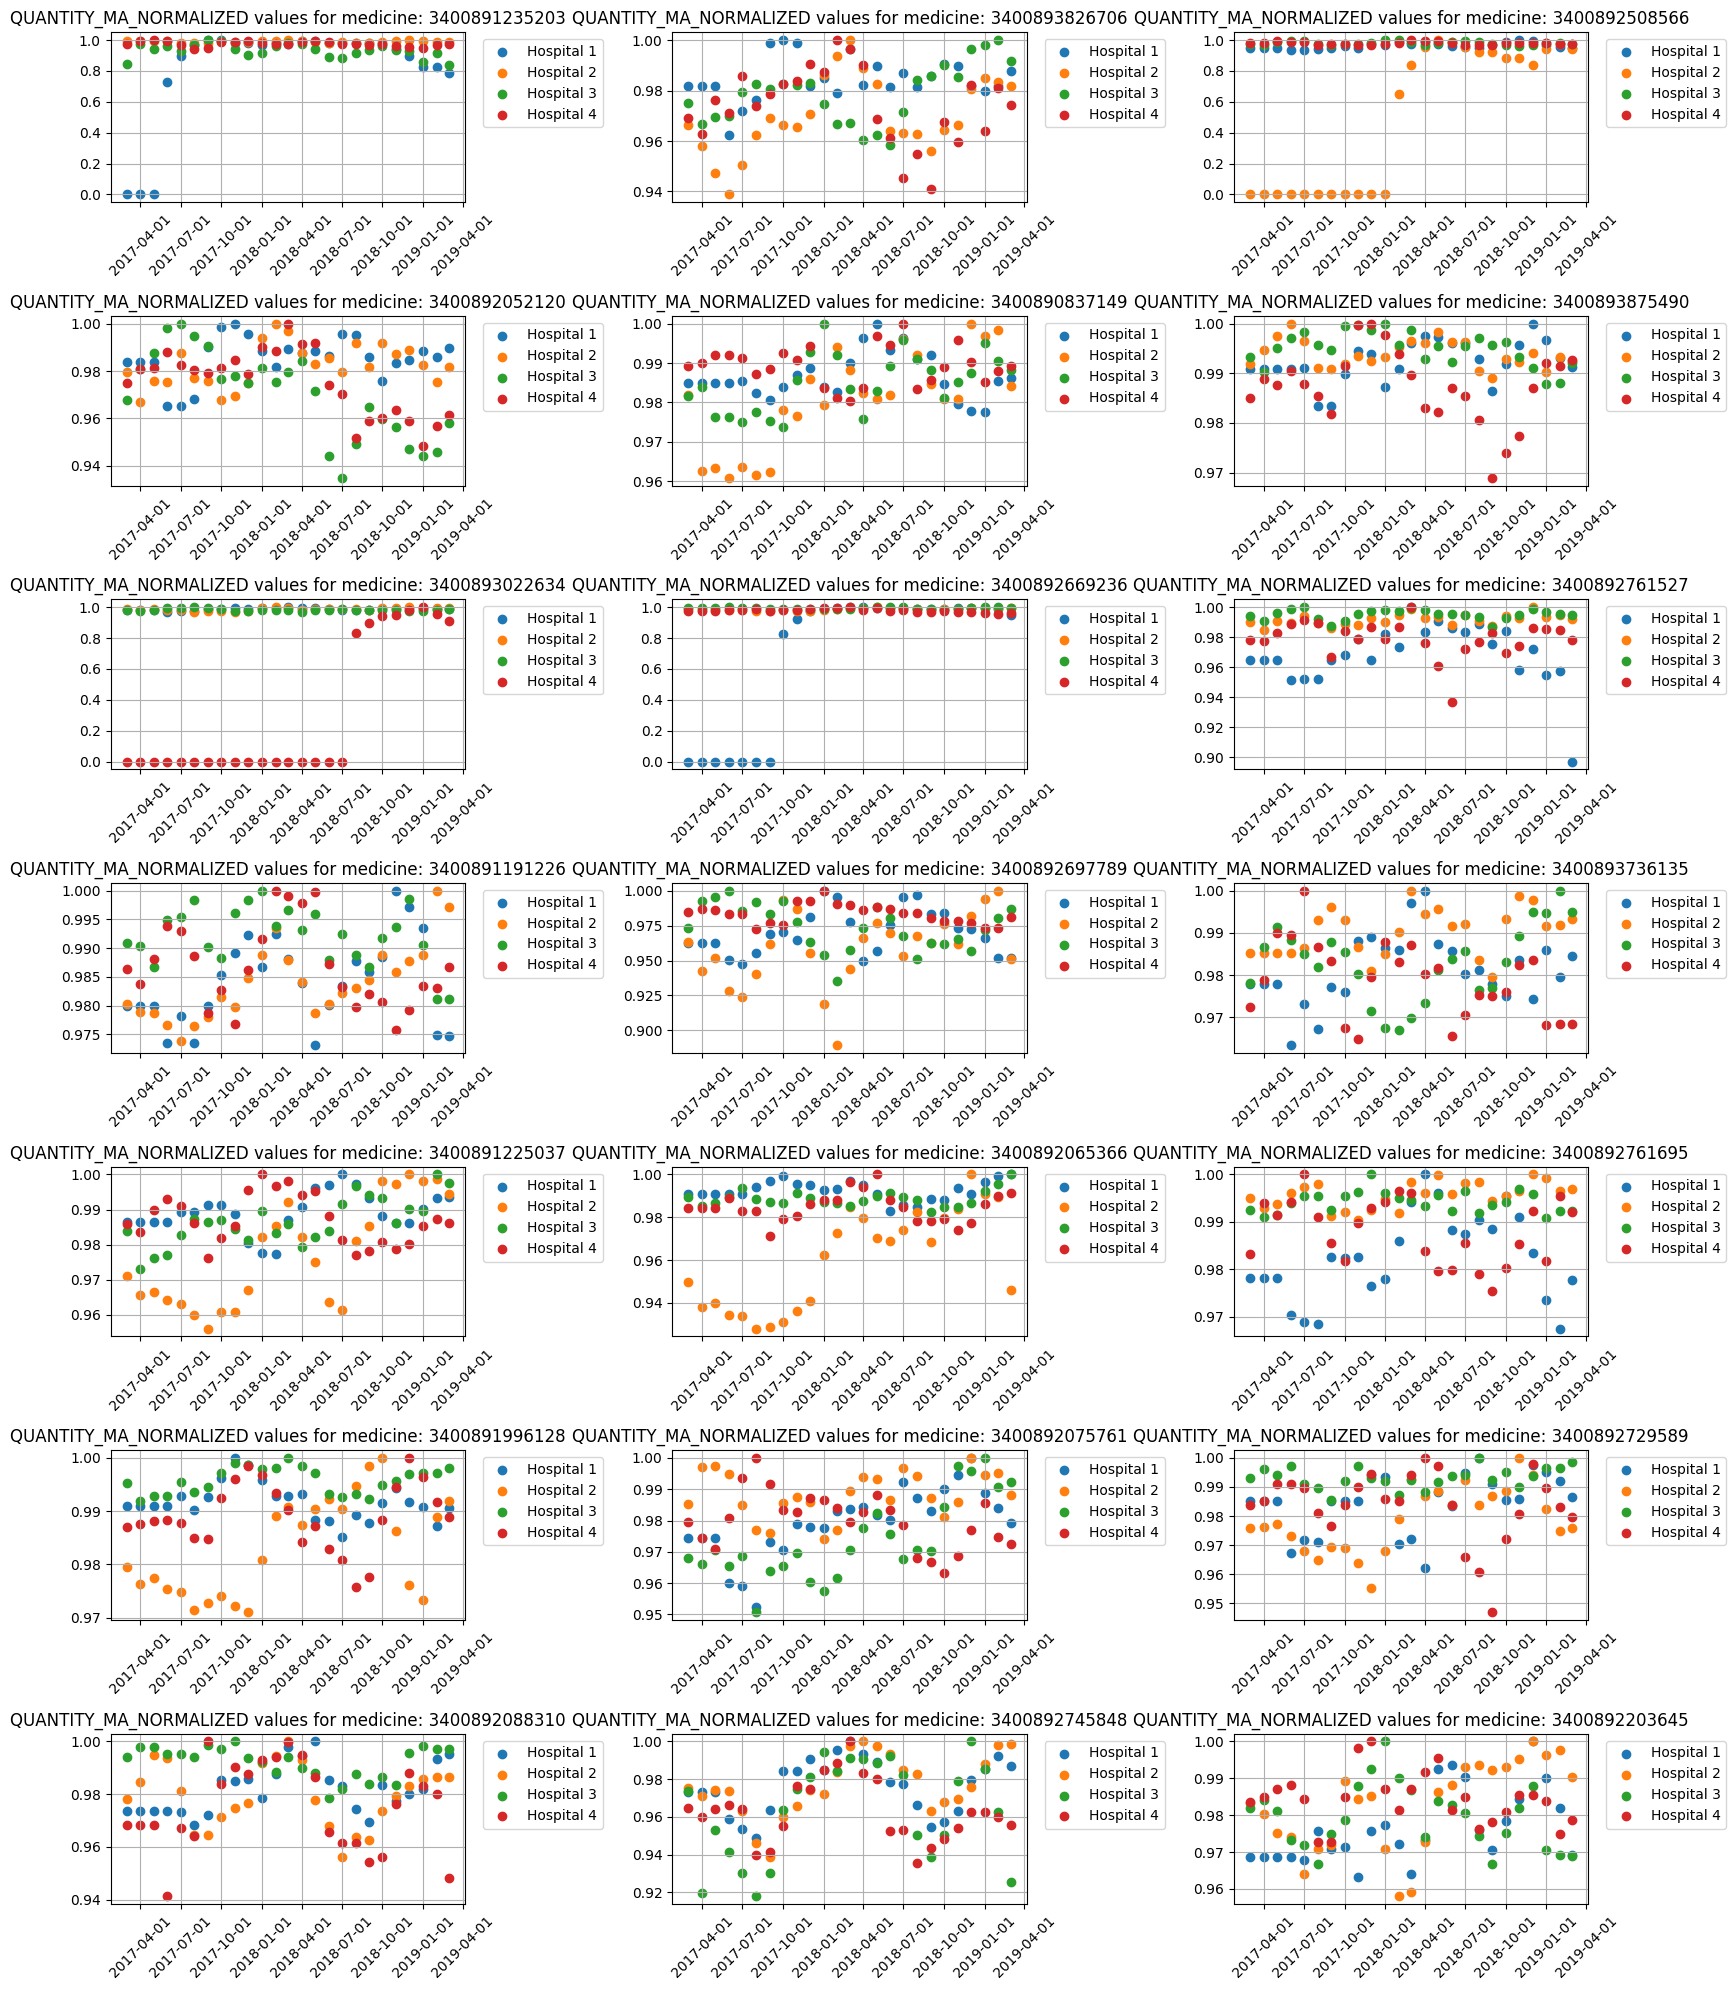

In [ ]:

def normalize_log_transform(df):
    df['QUANTITY_MA_NORMALIZED'] = df.groupby('HOSPI_CODE_UCD')['QUANTITY_MA'].transform(lambda x: np.log1p(x) / np.log1p(x.max()))
    return df

df_h1_normalized = normalize_log_transform(df_h1.copy())
df_h2_normalized = normalize_log_transform(df_h2.copy())
df_h3_normalized = normalize_log_transform(df_h3.copy())
df_h4_normalized = normalize_log_transform(df_h4.copy())


plot_consumption(df_h1_normalized,df_h2_normalized,df_h3_normalized,df_h4_normalized, 'QUANTITY_MA_NORMALIZED')

## Making individual predictions

In [8]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

def predict_medicine_consumption(df, medicine, df_scores, hospital = '-'):

  df = df.fillna(0)
  X = df[df['HOSPI_CODE_UCD'] == medicine].drop(['QUANTITY', 'DATE', 'WEEK', 'CLUSTER'], axis=1).copy().values
  y = df[df['HOSPI_CODE_UCD'] == medicine]['QUANTITY'].copy().values

  # Define the parameter distributions for RandomizedSearchCV
  param_distributions = {
      'max_depth': np.arange(2, 31, 2),
      'n_estimators': np.arange(2, 201, 2),
      'max_features': ['sqrt', 'log2'],
      'min_samples_split': np.arange(2, 11, 2),
      'min_samples_leaf': np.arange(2, 5, 1)
  }

  # Create the RandomizedSearchCV object
  randomized_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                          param_distributions=param_distributions,
                                          n_iter=100,
                                          cv=5,
                                          random_state=42)

  # Fit the RandomizedSearchCV object to the data
  randomized_search.fit(X, y)

  # Get the best estimator
  best_estimator = randomized_search.best_estimator_

  # Make predictions using the best estimator
  y_pred = best_estimator.predict(X)

  # Calculate R^2 score
  r2 = r2_score(y, y_pred)

  # Calculate MAE
  mae = mean_absolute_error(y, y_pred)

  # Calculate RMSE
  rmse = np.sqrt(mean_squared_error(y, y_pred))

  # Print the best parameters, best score, and evaluation metrics
  print('Medicine:' + str(medicine))
  print('Best Parameters:', randomized_search.best_params_)
  print('Best Score:', randomized_search.best_score_)
  print('R^2 Score:', r2)
  print('MAE:', mae)
  print('RMSE:', rmse)
  print()


  # Create the new row as a DataFrame
  new_row = pd.DataFrame({'ID_SITE_RATTACHE': [hospital],
                          'HOSPI_CODE_UCD': [medicine],
                          'R2': [r2],
                          'RMSE': [rmse],
                          'MAE': [mae]})

  # Append the new row to the DataFrame
  df_scores = pd.concat([df_scores, new_row], ignore_index=True)

  # Return the updated DataFrame
  return df_scores


In [10]:
def predict_medicine_consumption_cluster(df, hospital = '-', cluster = '-'):

  df = df.fillna(0)
  X = df.drop(['QUANTITY', 'DATE', 'WEEK', 'CLUSTER'], axis=1).copy().values
  y = df['QUANTITY'].copy().values

  # Define the parameter distributions for RandomizedSearchCV
  param_distributions = {
      'max_depth': np.arange(2, 31, 2),
      'n_estimators': np.arange(2, 201, 2),
      'max_features': ['sqrt', 'log2'],
      'min_samples_split': np.arange(2, 11, 2),
      'min_samples_leaf': np.arange(2, 5, 1)
  }

  # Create the RandomizedSearchCV object
  randomized_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                          param_distributions=param_distributions,
                                          n_iter=100,
                                          cv=5,
                                          random_state=42)

  # Fit the RandomizedSearchCV object to the data
  randomized_search.fit(X, y)

  # Get the best estimator
  best_estimator = randomized_search.best_estimator_

  # Make predictions using the best estimator
  y_pred = best_estimator.predict(X)

  # Calculate R^2 score
  r2 = r2_score(y, y_pred)

  # Calculate MAE
  mae = mean_absolute_error(y, y_pred)

  # Calculate RMSE
  rmse = np.sqrt(mean_squared_error(y, y_pred))

  # Print the best parameters, best score, and evaluation metrics
  print(f'Hospital: {hospital} Cluster: ' + str(cluster))
  print('Best Parameters:', randomized_search.best_params_)
  print('Best Score:', randomized_search.best_score_)
  print('R^2 Score:', r2)
  print('MAE:', mae)
  print('RMSE:', rmse)
  print()

  return

## Prediction for each hospital and each medicine

### Hospital 1

In [ ]:
df_prediction_scores_h1 = pd.DataFrame(columns=['ID_SITE_RATTACHE', 'HOSPI_CODE_UCD', 'R2', 'RMSE', 'MAE'])

for medicine in df_h1.HOSPI_CODE_UCD.unique():
  df_prediction_scores_h1 = predict_medicine_consumption(df_h1,medicine, df_prediction_scores_h1, hospital = 'HOSPI_1')

df_prediction_scores_h1

Medicine:3400890837149
Best Parameters: {'n_estimators': 56, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 8}
Best Score: -0.9344056206353132
R^2 Score: 0.5461586322219341
MAE: 96.72675660252455
RMSE: 145.3897701204087

Medicine:3400893826706
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 28}
Best Score: -0.10178481094932253
R^2 Score: 0.47360014350278723
MAE: 267.45232667732654
RMSE: 380.87976367213076

Medicine:3400892729589
Best Parameters: {'n_estimators': 34, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 8}
Best Score: -0.10257021896869647
R^2 Score: 0.38009276666556324
MAE: 421.27076962906375
RMSE: 577.7280354068915

Medicine:3400892088310
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 28}
Best Score: -20.4258478480766
R^2 Score: 0.4886648877223947
MAE: 18

,ID_SITE_RATTACHE,HOSPI_CODE_UCD,R2,RMSE,MAE
0,HOSPI_1,3400890837149,0.546159,145.389770,96.726757
1,HOSPI_1,3400893826706,0.473600,380.879764,267.452327
2,HOSPI_1,3400892729589,0.380093,577.728035,421.270770
3,HOSPI_1,3400892088310,0.488665,241.271643,187.399882
4,HOSPI_1,3400892075761,0.415555,126.117897,96.266840
5,HOSPI_1,3400892745848,0.659301,695.554298,493.040134
6,HOSPI_1,3400893736135,0.556864,193.513553,153.775616
7,HOSPI_1,3400892697789,0.346943,173.310175,133.644068
8,HOSPI_1,3400892203645,0.261837,145.700164,114.523333
9,HOSPI_1,3400891235203,0.882625,217.514991,180.140854


### Hospital 2

In [ ]:
df_prediction_scores_h2 = pd.DataFrame(columns=['ID_SITE_RATTACHE', 'HOSPI_CODE_UCD', 'R2', 'RMSE', 'MAE'])

for medicine in df_h2.HOSPI_CODE_UCD.unique():
  df_prediction_scores_h2 = predict_medicine_consumption(df_h2, medicine, df_prediction_scores_h2, hospital = 'HOSPI_2')

df_prediction_scores_h2

Medicine:3400890837149
Best Parameters: {'n_estimators': 148, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30}
Best Score: -0.14497690254676113
R^2 Score: 0.6259697356376028
MAE: 189.84946507787646
RMSE: 236.30576472629147

Medicine:3400893826706
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 28}
Best Score: -0.26263599771518786
R^2 Score: 0.6567007314993252
MAE: 139.87198275833808
RMSE: 185.92600314577632

Medicine:3400892729589
Best Parameters: {'n_estimators': 56, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 8}
Best Score: -0.2426272536752463
R^2 Score: 0.7190400293187831
MAE: 262.90422101113165
RMSE: 318.3950423818193

Medicine:3400892088310
Best Parameters: {'n_estimators': 172, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
Best Score: 0.08059470303001277
R^2 Score: 0.62463139188796
MAE: 

### Hospital 3

In [ ]:
df_prediction_scores_h3 = pd.DataFrame(columns=['ID_SITE_RATTACHE', 'HOSPI_CODE_UCD', 'R2', 'RMSE', 'MAE'])

for medicine in df_h3.HOSPI_CODE_UCD.unique():
  df_prediction_scores_h3 = predict_medicine_consumption(df_h3, medicine, df_prediction_scores_h3, hospital = 'HOSPI_3')

df_prediction_scores_h3

### Hospital 4

In [ ]:
df_prediction_scores_h4 = pd.DataFrame(columns=['ID_SITE_RATTACHE', 'HOSPI_CODE_UCD', 'R2', 'RMSE', 'MAE'])

for medicine in df_h4.HOSPI_CODE_UCD.unique():
  df_prediction_scores_h4 = predict_medicine_consumption(df_h4, medicine, df_prediction_scores_h4, hospital = 'HOSPI_4')

df_prediction_scores_h4

### Unified dataset

In [ ]:
medicines_h1 = set(df_h1.HOSPI_CODE_UCD.unique())
medicines_h2 = set(df_h2.HOSPI_CODE_UCD.unique())
medicines_h3 = set(df_h3.HOSPI_CODE_UCD.unique())
medicines_h4 = set(df_h4.HOSPI_CODE_UCD.unique())

medicines = medicines_h1 | medicines_h2 | medicines_h3 | medicines_h4

df_prediction_scores_unified = pd.DataFrame(columns=['ID_SITE_RATTACHE', 'HOSPI_CODE_UCD', 'R2', 'RMSE', 'MAE'])

df_h1_modified = df_h1.copy()
df_h2_modified = df_h2.copy()
df_h3_modified = df_h3.copy()
df_h4_modified = df_h4.copy()

df_h1_modified['ID_SITE_RATTACHE'] = 1
df_h2_modified['ID_SITE_RATTACHE'] = 2
df_h3_modified['ID_SITE_RATTACHE'] = 3
df_h4_modified['ID_SITE_RATTACHE'] = 4


for medicine in medicines:
  df_prediction_scores_unified = predict_medicine_consumption(pd.concat([df_h1_modified, df_h2_modified, df_h3_modified, df_h4_modified]),medicine, df_prediction_scores_unified)

df_prediction_scores_unified

## Cluster approach

In [17]:
def predict_cluster(df, hospital, cluster):
  medicines = df.HOSPI_CODE_UCD.unique()

  print(f'Medicines in cluster {cluster}: ')
  print()

  for medicine in medicines:
    print(f'--- {medicine}')
  print()

  predict_medicine_consumption_cluster(df, hospital= hospital, cluster = cluster)

### Hospital 1 - Cluster 0

In [18]:
predict_cluster(df_h1_cluster_0, 'HOSPI_1', '0')

Medicines in cluster 0: 

--- 3400892088310
--- 3400892075761
--- 3400892203645
--- 3400892065366
--- 3400892052120
--- 3400891996128

Hospital: HOSPI_1 Cluster: 0
Best Parameters: {'n_estimators': 144, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 16}
Best Score: 0.9855300603541526
R^2 Score: 0.9909974745335188
MAE: 744.3182301047815
RMSE: 1900.5133739486341



### Hospital 1 - Cluster 1

In [19]:
predict_cluster(df_h1_cluster_1, 'HOSPI_1', '1')

Medicines in cluster 1: 

--- 3400893826706
--- 3400893736135
--- 3400893875490

Hospital: HOSPI_1 Cluster: 1
Best Parameters: {'n_estimators': 118, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 18}
Best Score: 0.9685840429139961
R^2 Score: 0.980900137467409
MAE: 296.25978250373265
RMSE: 439.9549748778113



### Hospital 1 - Cluster 2

In [20]:
predict_cluster(df_h1_cluster_2, 'HOSPI_1', '2')

Medicines in cluster 2: 

--- 3400890837149
--- 3400891235203
--- 3400891225037
--- 3400891191226

Hospital: HOSPI_1 Cluster: 2
Best Parameters: {'n_estimators': 56, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 8}
Best Score: 0.9616174508616739
R^2 Score: 0.9767902521478725
MAE: 552.0819710207464
RMSE: 928.5972222104966



### Hospital 1 - Cluster 3



In [21]:
predict_cluster(df_h1_cluster_3, 'HOSPI_1', '3')

Medicines in cluster 3: 

--- 3400892729589
--- 3400892745848
--- 3400892697789
--- 3400892761527
--- 3400893022634
--- 3400892761695
--- 3400892669236
--- 3400892508566

Hospital: HOSPI_1 Cluster: 3
Best Parameters: {'n_estimators': 172, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
Best Score: 0.8212123948182459
R^2 Score: 0.9355867516018199
MAE: 400.8872354685978
RMSE: 674.308146766299



### Hospital 2 - Cluster 0

In [ ]:
predict_cluster(df_h2_cluster_0, 'HOSPI_2', '0')

Medicines in cluster 0: 

--- 3400892088310
--- 3400892075761
--- 3400892203645
--- 3400892065366
--- 3400892052120
--- 3400891996128



### Hospital 2 - Cluster 1

In [ ]:
predict_cluster(df_h2_cluster_1, 'HOSPI_2', '1')

### Hospital 2 - Cluster 2

In [ ]:
predict_cluster(df_h2_cluster_2, 'HOSPI_2', '2')

### Hospital 2 - Cluster 3

In [ ]:
predict_cluster(df_h2_cluster_3, 'HOSPI_2', '3')